In [1]:
from syft.service.action.action_graph_service import ActionGraphService
from syft.service.action.action_graph import InMemoryActionGraphStore, InMemoryGraphConfig, InMemoryStoreClientConfig

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/shubham/PySyft


In [2]:
import syft as sy

In [3]:
store_config = InMemoryGraphConfig()

In [4]:
graph_store = InMemoryActionGraphStore(store_config=store_config)

In [11]:
action_graph_service = ActionGraphService(store=graph_store)

In [14]:
sy.deserialize(sy.serialize(graph_store, to_bytes=True), from_bytes=True)

In [5]:
from syft.service.context import AuthedServiceContext
from syft.node.credentials import SyftSigningKey

In [6]:
from syft.service.action.action_graph import Action
from syft.service.action.numpy import NumpyArrayObject, ActionObject
import numpy as np

In [7]:
signing_key = SyftSigningKey.generate()
authed_context = AuthedServiceContext(credentials=signing_key.verify_key)

In [8]:
action_obj_a = ActionObject.from_obj([1, 2, 3])
action_obj_b = ActionObject.from_obj([2, 3, 4])

In [9]:
action_obj_a.id

<UID: 291fb00451bc4d5db70b22fe6d6d7459>

In [10]:
action1 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_a.syft_lineage_id],
    kwargs={}
)
action1

```python
class Action:
  id: str = 4e81074dd7cc443fafba210c58b103a0
  path: str = "action.execute"
  op: str = "np.array"
  remote_self: str = None
  args: str = [<LineageID: 291fb00451bc4d5db70b22fe6d6d7459 - 2431161864281937>]
  kwargs: str = {}
  result_id: str = cd8d51a321f24f5d954acbdfc814a006

```

In [11]:
action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_b.syft_lineage_id],
    kwargs={}
)
action2

```python
class Action:
  id: str = a9a712b7e2944e13855ec3e3e44b573e
  path: str = "action.execute"
  op: str = "np.array"
  remote_self: str = None
  args: str = [<LineageID: 3135274c03b74a43bcc49db0642fcc1b - 463263902099709509>]
  kwargs: str = {}
  result_id: str = b30a94f144c44632ab3699a9626cf9da

```

In [12]:
action_graph_service.add_action(context=authed_context, action=action1)

```python
class NodeActionData:
  id: str = 4e81074dd7cc443fafba210c58b103a0
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 05:09:20
  updated_at: str = None
  credentials: str = 3e3b4ab94cf00ff1be9baac527b42c5a2e9879ca62fe732b78a1fcea80cae26f

```

In [13]:
action_graph_service.add_action(context=authed_context, action=action2)

UID: 4e81074dd7cc443fafba210c58b103a0
Node: class NodeActionData:
  id: str = 4e81074dd7cc443fafba210c58b103a0
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 05:09:20
  updated_at: str = None
  credentials: str = 3e3b4ab94cf00ff1be9baac527b42c5a2e9879ca62fe732b78a1fcea80cae26f

Result Id: cd8d51a321f24f5d954acbdfc814a006


```python
class NodeActionData:
  id: str = a9a712b7e2944e13855ec3e3e44b573e
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 05:09:21
  updated_at: str = None
  credentials: str = 3e3b4ab94cf00ff1be9baac527b42c5a2e9879ca62fe732b78a1fcea80cae26f

```

In [14]:
import networkx as nx

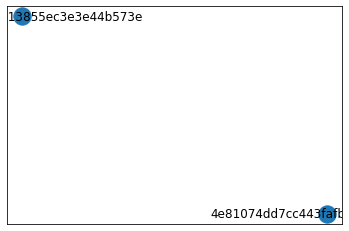

In [15]:
nx.draw_networkx(action_graph_service.store.graph.db)

In [16]:
action_res = Action(
    path="action.execute",
    op="__add__",
    remote_self=action1.result_id,
    args=[action2.result_id],
    kwargs={}
)
action_res

```python
class Action:
  id: str = 78dd632d61e94ec2960ca95e22819f32
  path: str = "action.execute"
  op: str = "__add__"
  remote_self: str = cd8d51a321f24f5d954acbdfc814a006
  args: str = [<LineageID: b30a94f144c44632ab3699a9626cf9da - 255369493466786716>]
  kwargs: str = {}
  result_id: str = 99d2ccf76aeb421e861bbfff5b8a2c19

```

In [17]:
action_graph_service.add_action(context=authed_context, action=action_res)

UID: 4e81074dd7cc443fafba210c58b103a0
Node: class NodeActionData:
  id: str = 4e81074dd7cc443fafba210c58b103a0
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 05:09:20
  updated_at: str = None
  credentials: str = 3e3b4ab94cf00ff1be9baac527b42c5a2e9879ca62fe732b78a1fcea80cae26f

Result Id: cd8d51a321f24f5d954acbdfc814a006
Found: 4e81074dd7cc443fafba210c58b103a0
UID: a9a712b7e2944e13855ec3e3e44b573e
Node: class NodeActionData:
  id: str = a9a712b7e2944e13855ec3e3e44b573e
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 05:09:21
  updated_at: str = None
  credentials: str = 3e3b4ab94cf00ff1be9baac527b42c5a2e9879ca62fe732b78a1fcea80cae26f

Result Id: b30a94f144c44632ab3699a9626cf9da
Found: a9a712b7e2944e13855ec3e3e44b573e


```python
class NodeActionData:
  id: str = 78dd632d61e94ec2960ca95e22819f32
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 05:09:37
  updated_at: str = None
  credentials: str = 3e3b4ab94cf00ff1be9baac527b42c5a2e9879ca62fe732b78a1fcea80cae26f

```

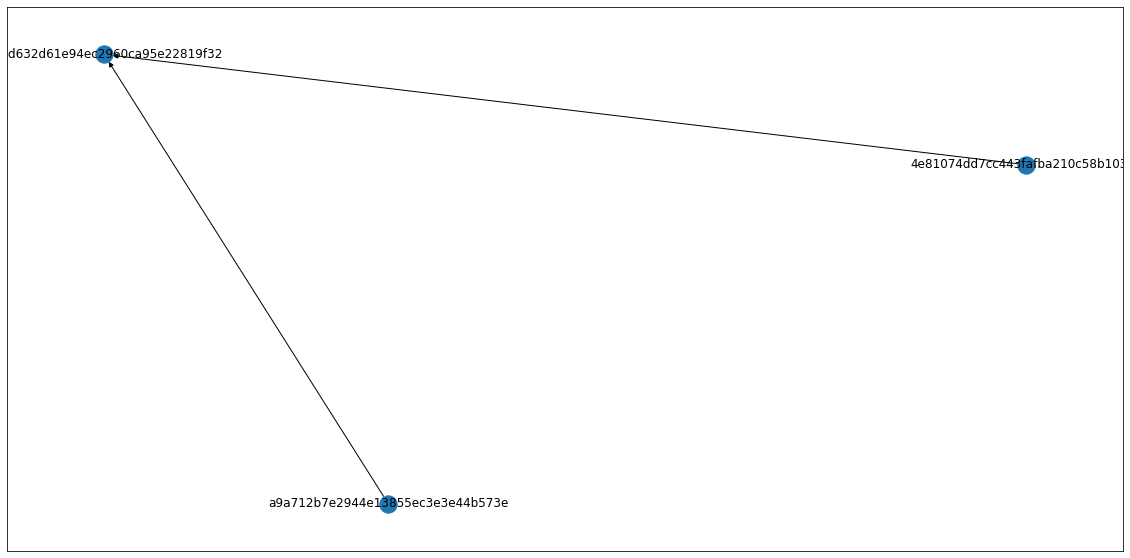

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

In [13]:
client.api.lib.numpy.array([1, 2, 3])

In [17]:
action = Action(
    path="syft.lib",
    op="np.array",
    remote_self=action_obj_a.syft_lineage_id,
    result_id=action_obj_a.id,
    args=[],
    kwargs={}
)

# action_a = action_obj_a.syft_make_method_action(op='np.array')
# action_b = action_obj_b.syft_make_method_action(op='init')

In [23]:
action

```python
class Action:
  id: str = e0b68b95e5cc4166b8f0312a538def5b
  path: str = "syft.lib"
  op: str = "np.array"
  remote_self: str = 38270fccd7194a4eb8575d635041742f
  args: str = []
  kwargs: str = {}
  result_id: str = 38270fccd7194a4eb8575d635041742f

```

In [ ]:

client.upload_dataset()
dataset = client.datasets['Cancer']
train_asset = dataset['train']

In [18]:
# let's say e.g.
train_asset = action_obj_a

In [ ]:
result = train_asset + train_asset

In [21]:
action2 = Action(
    path="syft.lib.numpy",
    op="add",
    remote_self=train_asset.syft_lineage_id,
    args=[train_asset.syft_lineage_id],
    kwargs={}
)
action2

```python
class Action:
  id: str = 5eebf4dacaed4d78ab71550f22754651
  path: str = "syft.lib.numpy"
  op: str = "add"
  remote_self: str = 38270fccd7194a4eb8575d635041742f
  args: str = [<LineageID: 38270fccd7194a4eb8575d635041742f - 1841932433399465650>]
  kwargs: str = {}
  result_id: str = 51018149d9d6476c900ddff8ee673c47

```

In [ ]:
actionservice.update(train_asset.id, data=[1,2 ,3 ,5])

In [30]:
train_asset = {"name": "John"}

In [40]:
result1 = train_asset['name'] + " LastName"

In [32]:
# train_asset = train_asset + train_asset
train_asset.update({"name": "John Wick", "last_name": "Last Name"})

In [36]:
result2 = train_asset["name"] + " String"

In [41]:
result1

'John Wick LastName'

In [38]:
result2

'John Wick String'

In [39]:
train_asset

{'name': 'John Wick', 'last_name': 'Last Name'}

In [ ]:
result = 2 + 2

In [22]:
action2

```python
class Action:
  id: str = 5eebf4dacaed4d78ab71550f22754651
  path: str = "syft.lib.numpy"
  op: str = "add"
  remote_self: str = 38270fccd7194a4eb8575d635041742f
  args: str = [<LineageID: 38270fccd7194a4eb8575d635041742f - 1841932433399465650>]
  kwargs: str = {}
  result_id: str = 51018149d9d6476c900ddff8ee673c47

```

In [11]:
action_a

```python
class Action:
  id: str = 81a50672c9b24485b536a318bb158fde
  path: str = "NumpyArrayObject"
  op: str = "np.array"
  remote_self: str = 38270fccd7194a4eb8575d635041742f
  args: str = []
  kwargs: str = {}
  result_id: str = 34bb43606fda43239e5081e734fc9e09

```

In [7]:
action_a.remote_self.id, action_a.remote_self.syft_history_hash

(<UID: 36f9619a9b004b1c84684c01da2130b8>, 2032065536009144745)

In [8]:
action_a

```python
class Action:
  id: str = 5b855c4552c54cabbf1858f3a4cd3e89
  path: str = "NumpyArrayObject"
  op: str = "init"
  remote_self: str = 36f9619a9b004b1c84684c01da2130b8
  args: str = []
  kwargs: str = {}
  result_id: str = 9ebc3430178a4cc09754dea154020245

```

In [9]:
action_b

```python
class Action:
  id: str = c94a808fb87c44fc8a39fbffd79fe229
  path: str = "NumpyArrayObject"
  op: str = "init"
  remote_self: str = ff62a9c6421f4aacbd6a8121a6303bbc
  args: str = []
  kwargs: str = {}
  result_id: str = 75628eae8b6a43b6ba509ec04ab0f4ff

```

In [10]:
action_c = action_obj_a.syft_make_method_action(op='add', args=[action_obj_b])
action_c

```python
class Action:
  id: str = 353771c753eb403ba0c417a63b990fc6
  path: str = "NumpyArrayObject"
  op: str = "add"
  remote_self: str = 36f9619a9b004b1c84684c01da2130b8
  args: str = [<LineageID: ff62a9c6421f4aacbd6a8121a6303bbc - 1765357537414779233>]
  kwargs: str = {}
  result_id: str = f7e1aa0afffd439eaa47a53f9d070e5b

```

In [11]:
action_d = action_obj_a.syft_make_method_action(op='add', args=[action_obj_a, action_obj_b, action_obj_b])

In [12]:
action_d

```python
class Action:
  id: str = d8b1987536f94acd98b67db30dc00474
  path: str = "NumpyArrayObject"
  op: str = "add"
  remote_self: str = 36f9619a9b004b1c84684c01da2130b8
  args: str = [<LineageID: 36f9619a9b004b1c84684c01da2130b8 - 2032065536009144745>, <LineageID: ff62a9c6421f4aacbd6a8121a6303bbc - 1765357537414779233>, <LineageID: ff62a9c6421f4aacbd6a8121a6303bbc - 1765357537414779233>]
  kwargs: str = {}
  result_id: str = 7e00d9148bc94b7c989cf72945b453e9

```

In [13]:
action_graph = ActionGraph(node_uid=UID(), graph_client=InMemoryGraphClient)
action_graph

In [14]:
action_graph.add_action(action_a)

In [15]:
action_graph.add_action(action_b)

In [16]:
action_graph.add_action(action_c)

In [18]:
import syft as sy
s = sy.serialize(action_graph, to_bytes=True)

In [19]:
d = sy.deserialize(s, from_bytes=True)

In [20]:
d

In [21]:
d.nodes() == action_graph.nodes()
d.edges() == action_graph.edges()

True

In [18]:
graph = action_graph.client.graph

In [41]:
graph

In [42]:
nodes = graph.nodes()
edges = graph.edges()

In [43]:
list(edges)

[(class ActionGraphNode:
    id: str = 0f631a39ba62494086520c8eeecd8e8e
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44,
  class ActionGraphNode:
    id: str = 0f631a39ba62494086520c8eeecd8e8e
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44),
 (class ActionGraphNode:
    id: str = 0f631a39ba62494086520c8eeecd8e8e
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44,
  class ActionGraphNode:
    id: str = 61c1174f28b84c6cb248cf9cd97d7cd0
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44),
 (class ActionGraphNode:
    id: str = 2b4a6acbf21e40458544956d2b984fb8
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44,
  class ActionGraphNode:
    id: str = 2b4a6acbf21e40458544956d2b984fb8
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44),
 (class ActionGraphNode:
    id: str = 2b4a6acbf21e40458544956d2b984fb8
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44,
  class ActionGraphNode:
    id: str = 61c1174f28b84c6cb248cf9cd97d7cd0
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44),
 (class ActionGraphNode:
    id: str = 61c1174f28b84c6cb248cf9cd97d7cd0
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44,
  class ActionGraphNode:
    id: str = 61c1174f28b84c6cb248cf9cd97d7cd0
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44)]

In [44]:
len(edges)

5

In [25]:
import syft as sy

In [26]:
graph_dict = nx.to_dict_of_dicts(graph)

In [45]:
graph_dict

{class ActionGraphNode:
   id: str = 0f631a39ba62494086520c8eeecd8e8e
   action: str = syft.core.node.new.action_object.Action
   status: str = ActionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-04-13 07:08:44: {class ActionGraphNode:
    id: str = 0f631a39ba62494086520c8eeecd8e8e
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44: {},
  class ActionGraphNode:
    id: str = 61c1174f28b84c6cb248cf9cd97d7cd0
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44: {}},
 class ActionGraphNode:
   id: str = 2b4a6acbf21e40458544956d2b984fb8
   action: str = syft.core.node.new.action_object.Action
   status: str = ActionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-04-13 07:08:44: {class ActionGraphNode:
    id: str = 2b4a6acbf21e40458544956d2b984fb8
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44: {},
  class ActionGraphNode:
    id: str = 61c1174f28b84c6cb248cf9cd97d7cd0
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44: {}},
 class ActionGraphNode:
   id: str = 61c1174f28b84c6cb248cf9cd97d7cd0
   action: str = syft.core.node.new.action_object.Action
   status: str = ActionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-04-13 07:08:44: {class ActionGraphNode:
    id: str = 61c1174f28b84c6cb248cf9cd97d7cd0
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44: {}}}

In [54]:
s = sy.serialize(graph_dict, to_bytes=True)

In [55]:
s

b'\x01\x00\x00\x00\x08\x00\x00\x00&\x0c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00r\x00\x00\x00\t\x00\x00\x00\x0e\x00\x00\x00builtins.dict\x00\x00\x00\x02\x00\x00\x00\x01\x00\x00\x00\x01\x00\x00\x00B\t\x03\x00\x02\x00\x00\x00\xc6\x02\x00\x00\x15\x03\x00\x00H\x06\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x05\x00\x00\x00\x1e\x00\x00\x00\r\x00\x00\x00\x1e\x00\x00\x00\x15\x00\x00\x00BW\x00\x00\x89\x05\x00\x00BW\x00\x00\xaa\x18\x00\x00\x02\x00\x00\x00}\x05\x00\x00\x0e\x00\x00\x00\xf1\n\x00\x00\x0e\x00\x00\x00\xf1\n\x00\x00\x0e\x00\x00\x00\x00\x00\x00\x00\\\x01\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00%\x00\x00\x00.\x00\x00\x005\x00\x00\x00.\x00\x00\x00\x05\x00\x00\x00\x82\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00syft.core.node.new.action_graph.ActionGraphNode\x00%\x00\x00\x00:\x00\x00\x00A\x03\x00\x00Z\x00\x00\x00-\x04\x00\x00\x1a\x00\x00\x00\x95\x04\x00\x002\x00\x00\x00\xc1\x04\x00\x00:\x00\x00\x00\x

In [56]:
d = sy.deserialize(s, from_bytes=True)

In [57]:
d

{class ActionGraphNode:
   id: str = 0f631a39ba62494086520c8eeecd8e8e
   action: str = syft.core.node.new.action_object.Action
   status: str = ActionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-04-13 07:08:44: {class ActionGraphNode:
    id: str = 0f631a39ba62494086520c8eeecd8e8e
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44: {},
  class ActionGraphNode:
    id: str = 61c1174f28b84c6cb248cf9cd97d7cd0
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44: {}},
 class ActionGraphNode:
   id: str = 2b4a6acbf21e40458544956d2b984fb8
   action: str = syft.core.node.new.action_object.Action
   status: str = ActionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-04-13 07:08:44: {class ActionGraphNode:
    id: str = 2b4a6acbf21e40458544956d2b984fb8
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44: {},
  class ActionGraphNode:
    id: str = 61c1174f28b84c6cb248cf9cd97d7cd0
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44: {}},
 class ActionGraphNode:
   id: str = 61c1174f28b84c6cb248cf9cd97d7cd0
   action: str = syft.core.node.new.action_object.Action
   status: str = ActionStatus.PROCESSING
   retry: str = 0
   created_at: str = 2023-04-13 07:08:44: {class ActionGraphNode:
    id: str = 61c1174f28b84c6cb248cf9cd97d7cd0
    action: str = syft.core.node.new.action_object.Action
    status: str = ActionStatus.PROCESSING
    retry: str = 0
    created_at: str = 2023-04-13 07:08:44: {}}}

In [58]:
d == graph_dict

True

In [51]:
regraph = nx.from_dict_of_dicts(d)

In [52]:
regraph.edges() == graph.edges()

True

In [53]:
regraph.nodes() == graph.nodes()

True

In [ ]:
class ActionGraph:
    def __init__(self):
        self.graph = nx.DiGraph()
        
    def add(self, node: ActionGraphObject):
        self.graph.add_node(node.id, data=node)
        
    def add_relationship(self, nodeA: ActionGraphObject, nodeB: ActionGraphObject):
        self.graph.add_edge(nodeA, nodeB)
        
    def remove_node(self, node: ActionGraphObject):
        self.graph.remove_node(node)
    
    def remove_edge(self, node: ActionGraphObject):
        self.graph.remove_edge(node)
        
    def neighbors_for(self, node: ActionGraphObject):
        return list(self.graph.neighbors(node))
        
    def visualize(self, arrows: bool = True):
        return nx.draw_networkx(self.graph)
        
    def remove_all_nodes_from(self, node: ActionGraphObject):
        all_adjacent_neighbors: list = []
            
        def find_adjacent_neighbors(node: ActionGraphObject, neighbors: set):           
            if not self.graph.neighbors(node):
                return 

            my_neighbors = self.graph.neighbors(node)
            for n in my_neighbors:
                if n not in neighbors:
                    neighbors.add(n)
                    self.find_adjacent_neighbors(n, neighbors)
                
        find_adjacent_neighbors(all_adjacent_neighbors)
        return all_adjacent_neighbors

In [ ]:
graph = ActionGraph()

In [ ]:
ago_a = ActionGraphObject.from_action_obj(action_obj_a)
ago_b = ActionGraphObject.from_action_obj(action_obj_b)

In [ ]:
ago_ack = ActionGraphObject.from_action(action)

In [ ]:
graph.add(ago_a)

In [ ]:
graph.add(ago_b)

In [ ]:
graph.add(ago_ack)

In [ ]:
graph.add_relationship(ago_b.id, ago_ack.id)

In [ ]:
graph.visualize()

In [ ]:
list(graph.graph.successors(ago_a.id))[0]

In [ ]:
action